In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Import data

In [6]:
g_data = pd.read_csv('poverty.txt', delim_whitespace=True, \
        index_col=[0])
g_data.head()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
Location,,,,,
Alabama,20.1,31.5,88.7,11.2,54.5
Alaska,7.1,18.9,73.7,9.1,39.5
Arizona,16.1,35.0,102.5,10.4,61.2
Arkansas,14.9,31.6,101.7,10.4,59.9
California,16.7,22.6,69.1,11.2,41.1


# Set up tensorflow graph

In [19]:
class TF_regression:
    def __init__(self):
        self.sess = tf.Session()
        self._build_graph()
    
    
    def _build_graph(self):
        self.A = tf.placeholder(dtype=tf.float32)
        self.b = tf.placeholder(dtype=tf.float32)
        
        At = tf.transpose(self.A)
        AtA = tf.matmul(At, self.A)
        AtA_inv = tf.matrix_inverse(AtA)
        AtA_invAt = tf.matmul(AtA_inv, At)
        self.x = tf.matmul(AtA_invAt, self.b)
        
    
    def onedim_regression(self, data):
        self.sess.run(tf.global_variables_initializer())
        
        # Create feed dictionary. Careful with row and column vectors
        data_A = np.array(data.loc[:, 'PovPct'], ndmin=2).T
        ones_A = np.array(np.ones(data.shape[0]), ndmin=2).T
        input_A = np.hstack((data_A, ones_A))
        input_b = np.array(data.loc[:, 'Brth15to17'], ndmin=2).T
        feed_dict = {self.A: input_A, self.b: input_b}
        
        output = self.sess.run(self.x, feed_dict=feed_dict)
        
        print('Regression equation:')
        print('\'Brth15to17\' = %.2f + %.2f\'PovPct\'' % (output[0], output[1]))
    
        # Graph of regression
        X = np.arange(0, 31)
        Y = output[0]*X + output[1]
        fig, ax = plt.subplots()
        ax.scatter(g_data['PovPct'], g_data['Brth15to17'])    # Scatterplot of data
        ax.plot(X, Y, color='k')    # Plot of regression
        ax.set_xlabel('Poverty (%)')
        ax.set_ylabel('Births 15-17')
        ax.set_title('Births 15-17 vs. Poverty %')
        plt.savefig('regression_Brth15to17_PovPct.pdf')
        
        
    def twodim_regression(self, data):
        self.sess.run(tf.global_variables_initializer())
        
        # Create feed dictionary. Careful with row and column vectors
        data_A = np.array(data.loc[:, ['PovPct', 'ViolCrime']])
        ones_A = np.array(np.ones(data.shape[0]), ndmin=2).T
        input_A = np.hstack((data_A, ones_A))
        input_b = np.array(data.loc[:, 'Brth15to17'], ndmin=2).T
        feed_dict = {self.A: input_A, self.b: input_b}
    
        output = self.sess.run(self.x, feed_dict=feed_dict)
    
        # Print the regression equation
        print('Regression equation:')
        print('\'Brth15to17\' = %.2f + %.2f\'PovPct\' + %.2f\'ViolCrime\'' \
            % (output[0], output[1], output[2]))

# Run regressions

Regression equation:
'Brth15to17' = 1.37 + 4.27'PovPct'
Regression equation:
'Brth15to17' = 1.04 + 0.34'PovPct' + 5.98'ViolCrime'


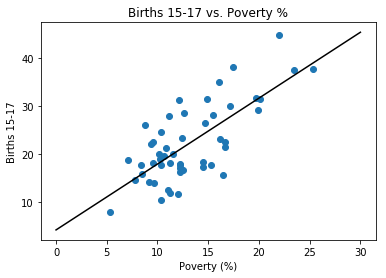

In [21]:
model = TF_regression()
model.onedim_regression(g_data)
model.twodim_regression(g_data)